# Ejercicio de programación Regresión Lineal

In [561]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# libreria pandas para manejo de datos
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

#libreria scikit-learn para machine learning (aprendizaje automatico)
from sklearn import preprocessing 

#import standard scaler para normalizacion de datos
from sklearn.preprocessing import StandardScaler

# import seaborn as sns

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida. 

In [562]:
# Leer datos separados por una coma
dataset = pd.read_csv('insurance.csv')
X = dataset.iloc[:, 2].values # matriz de variables independientes 
y = dataset.iloc[:, 6].values # vector de variables dependientes
# data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
# X, y = data[:, 0], data[:, 1]

m = y.size  # m = numero de ejemplos de entrenamiento

print(X)
print(y)
#------------------------------- sirve para convertir los datos categoricos a un formato numerico----------------


# LabelEncoder_X = LabelEncoder() # crear objeto de la clase LabelEncoder para codificar las variables categoricas en variables entero (0,1,2,3,4,5,6,7,8,9) en este caso solo hay dos categorias (0,1)

# X = LabelEncoder_X.fit_transform(X)
#--------------------------------------------------------------

#---------------------- normalizacion de datos -----------------

#Escala en función del mínimo y máximo

# print(x_train)
# print(x_test)
X= X.reshape(-1, 1) # convertir el vector x_train en una matriz de 1 columna
#y= y.reshape(-1, 1) # convertir el vector y_train en una matriz de 1 columna

#X = X.reshape(-1, 1) # convertir el vector x_test en una matriz de 1 columna

# ---------------------- escalado de datos -----------------

from sklearn.preprocessing import StandardScaler

X = preprocessing.StandardScaler().fit_transform(X)

#---------------------- min y max escalado -----------------
# from sklearn.preprocessing import Normalizer

# X = preprocessing.MinMaxScaler().fit_transform(X)

# print(X)

#---------------------- normalizacion de datos -----------------

# X = preprocessing.Normalizer().transform(X.T) # normalizar los datos de la matriz de variables independientes x_train
# X = X.T



# convertir matriz X a un vector columna




#--------------------------------------------------------------
# Codificar datos categoricos (variables cualitativas) en variables numericas (variables cuantitativas) dicho se convierte en variables numpy

# from sklearn.preprocessing import OneHotEncoder , LabelEncoder
# from sklearn.compose import ColumnTransformer
    
# ColumnTransformer_x = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [0])], remainder='passthrough') # crear objeto de la clase ColumnTransformer para codificar las variables categoricas en variables dummy (0,1) y el remainder es para que no se elimine la columna que no se codifica o se cambie al transformar

# x = np.array(ColumnTransformer_x.fit_transform(x), dtype=np.str)

# prueba regresion simple com otro funciones
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # dividir el dataset en conjunto de entrenamiento y conjunto de testing ordenados aleatoriamente con un 20% de datos para testing y 80% para entrenamiento x_train y x_test son las variables independientes y_train y y_test son las variables dependientes


# from sklearn.linear_model import LinearRegression

# regression = LinearRegression() # crear objeto de la clase LinearRegression para ajustar la regresion lineal simple

# regression.fit(x_train, y_train) # ajustar el objeto LinearRegression a la matriz de variables independientes x_train y el vector de variables dependientes y_train


# # predecir el conjunto de test

# y_pred = regression.predict(x_test) # predecir el vector de variables dependientes y_pred con el conjunto de testing x_test

# print(y_test, " = ", y_pred) # imprimir los valores reales y los valores predichos

# # visualizar los resultados del conjunto de entrenamiento

# pyplot.scatter(x_train, y_train, color='red') # graficar los puntos de entrenamiento
# pyplot.plot(x_train, regression.predict(x_train), color='blue') # graficar la recta de regresion lineal simple con los puntos de entrenamiento x_train y las predicciones de y_train

# pyplot.title('cargos vs edad') # titulo del grafico

# pyplot.xlabel('Índice de masa corporal') # etiqueta del eje x
# pyplot.ylabel('costos médico individual facturados por seguro de salud') # etiqueta del eje y

# pyplot.show() 

# print(dataset)

[27.9  33.77 33.   ... 36.85 25.8  29.07]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### 1.1 Trazar los datos

In [563]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('costo médico individual facturados por seguro de salud')
    pyplot.xlabel('indice de masa corporal')


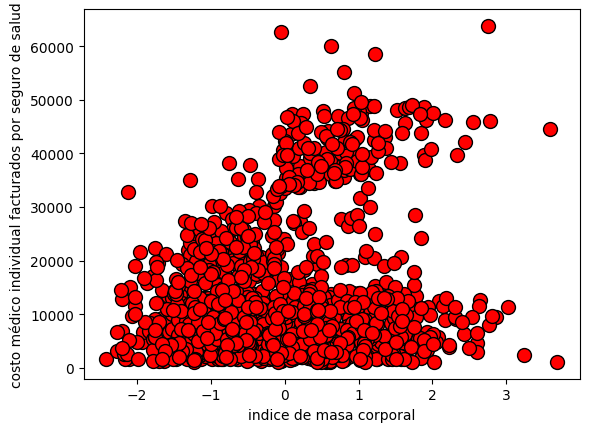

In [564]:
plotData(X, y)

In [565]:
pyplot.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [579]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).
print(X)

X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X)


[[ 1.         -0.45332   ]
 [ 1.          0.5096211 ]
 [ 1.          0.38330685]
 ...
 [ 1.          1.0148781 ]
 [ 1.         -0.79781341]
 [ 1.         -0.26138796]]
[[ 1.          1.         -0.45332   ]
 [ 1.          1.          0.5096211 ]
 [ 1.          1.          0.38330685]
 ...
 [ 1.          1.          1.0148781 ]
 [ 1.          1.         -0.79781341]
 [ 1.          1.         -0.26138796]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [567]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

In [568]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 161323436.79
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 161331907.69
Valor de costo esperado (aproximadamente)  54.24


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [569]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [570]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 1500
alpha = 1.02

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 13270.4223, 2401.0136
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

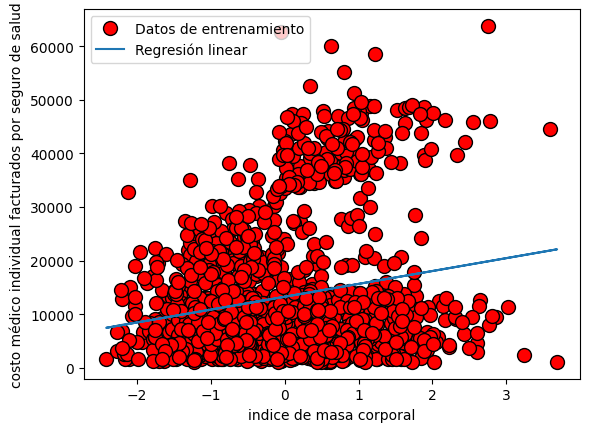

In [571]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [572]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 216739699.29

Para una población de = 70,000, se predice un beneficio de 348795448.29



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$. 

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

C:\Users\HP\AppData\Local\Temp\ipykernel_4668\3719303701.py:28: UserWarning: No contour levels were found within the data range.
  pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))


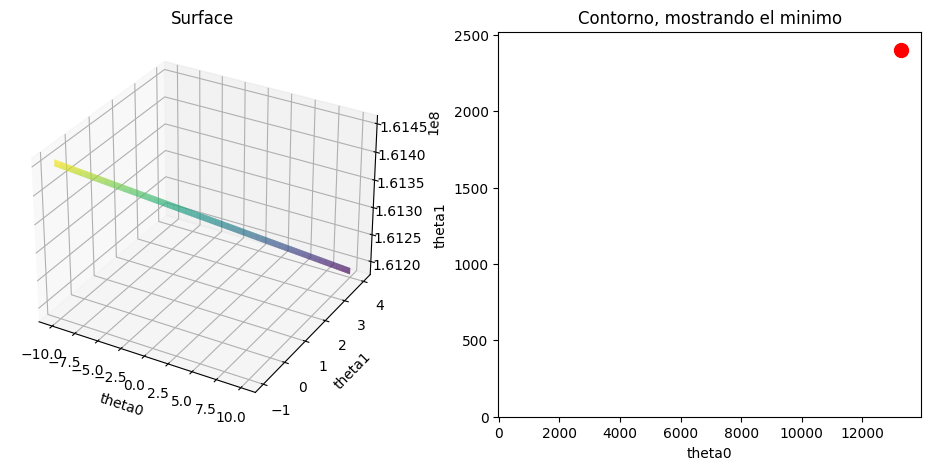

In [573]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass